In [1]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.stats import gaussian_kde

from edward.models import Poisson, Gamma, Empirical, Normal

plt.style.use('ggplot')

In [2]:
ed.set_seed(142)

In [3]:
# Model
N = 100

a = 2.0
b = 2.0
r = Gamma(a, b)
x = Poisson(rate=r, sample_shape=N)

In [4]:
# Data
sess = ed.get_session()
x_data, r_data = sess.run([x, r])

In [5]:
r_data

0.51277214

In [6]:
# True posterior (Gamma is conjugate to Poisson)
true_qr = Gamma(tf.cast(a + np.sum(x_data), tf.float32), tf.cast(b + N, tf.float32))

In [7]:
# Inference
T = 500
qr = Empirical(tf.Variable(tf.ones(T))) # Initialization must be at a nonzero probability point!

inference = ed.Gibbs({r: qr}, data={x: x_data})
inference.run()

/home/pedro/IST/Thesis/edward-venv/lib/python3.5/site-packages/edward/util/random_variables.py:50: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


500/500 [100%] ██████████████████████████████ Elapsed: 3s | Acceptance Rate: 1.000


In [8]:
qr.sample().eval()

0.5321269

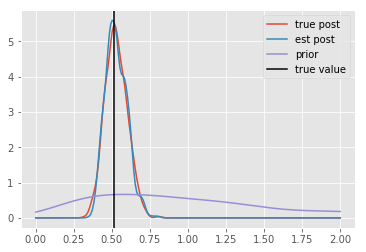

In [9]:
n_samples = 1000

samples_post = qr.sample(n_samples).eval()
samples_prior = r.sample(n_samples).eval()
true_post = true_qr.sample(n_samples).eval()

posterior_density = gaussian_kde(samples_post)
prior_density = gaussian_kde(samples_prior)
true_posterior_density = gaussian_kde(true_post)

xs = np.linspace(0,2,200)
plt.plot(xs, true_posterior_density(xs), label='true post')
plt.plot(xs, posterior_density(xs), label='est post')
plt.plot(xs, prior_density(xs), label='prior')
plt.axvline(x=r_data, c='black', label='true value')
plt.legend()
plt.show()

In [10]:
qr.mean().eval()

0.5282015

In [11]:
true_qr.mean().eval()

0.5294118

In [12]:
true_qr.concentration.eval()

54.0

In [13]:
true_qr.rate.eval()

102.0

In [14]:
r_data

0.51277214